In [75]:
import torch
import model.model as module_arch
import numpy as np
# 加载模型

from scipy.signal import resample

model = module_arch.AttnSleep()
checkpoint = torch.load('./saved/Exp1/14_05_2024_10_48_15_fold10/checkpoint-epoch90.pth')
model.load_state_dict(checkpoint["state_dict"])
model.eval()


num_eeg = 4
eeg_data=[[] for i in range(num_eeg)]
with open("wangjing_23-09_3_TP10_trough_eeg.txt") as file:
    count = 0
    for line in file:
        count += 1
        values = line.split(",")
        if count > 7:
            for i in range(num_eeg):
                eeg_data[i].append(values[i+1])

# 四通道单个测试

In [32]:
select_channel = 1
fs=256
start_min = 10
start_index = start_min*fs*60
end_index = int(start_index +30*fs)
eeg_data =np.array(eeg_data)
predict_data = eeg_data[:,start_index:end_index]
predict_data =np.array(predict_data)
predict_data=predict_data.astype(np.float32)
predict_data=np.reshape(predict_data,(4, 1, -1))
predict_data = np.array(list(resample(predict_data[i,0,:],100*30) for i in range(len(predict_data)) ))
predict_data=np.reshape(predict_data,(4, 1, -1))
# print(predict_data.shape)
predict_data=torch.from_numpy(predict_data)
output = model(predict_data)

In [33]:
output

tensor([[  3.7589,  -4.3111,   4.3468,  -3.0394,  -0.5933],
        [  3.3463,   2.6497,  -2.4675, -10.1351,   3.0071],
        [  7.8795,  -1.9865,  -0.9926,  -7.7153,   1.6060],
        [  5.0547,  -4.6115,   3.4381,  -2.3213,  -1.1034]],
       grad_fn=<AddmmBackward0>)

# 4通道整体测试

In [76]:
fs=256
duration = fs * 30
eeg_data =np.array(eeg_data)
split_data =[eeg_data[:,i:i+duration] for i in range(0, len(eeg_data[0]), duration)]

In [77]:
result=[]
for data in split_data:
    data = resample(data, 100*30, axis=1)
    predict_data =np.array(data)
    predict_data=predict_data.astype(np.float32)
    predict_data=np.reshape(predict_data,(4, 1, -1))
    predict_data=torch.from_numpy(predict_data)
    output = model(predict_data)
    output = torch.sum(output,dim=0)
    pred = torch.argmax(output, dim=0)
    result.append(pred.item())

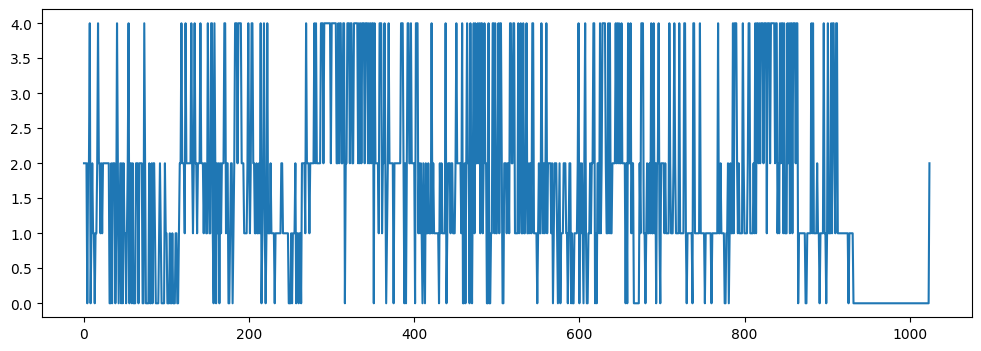

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot( result)           
plt.show()

tensor([ 27.4639, -10.7713,   3.7391, -14.9668,  -7.6182],
       grad_fn=<SumBackward1>)

# 单通道整体测试

[0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


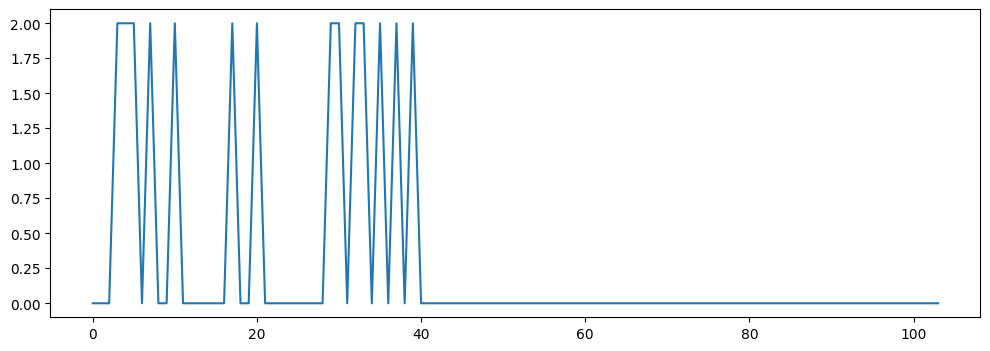

In [26]:
import matplotlib.pyplot as plt
result=[]
select_channel = 0
fs=256
duration = fs*30
eeg_data0=np.array(eeg_data[select_channel])
split_data = [eeg_data0[i:i+duration] for i in range(0, len(eeg_data0), duration)]
for data in split_data:
    data = resample(data, 100*30)
    data = np.reshape(data,(1,1,-1))
    data = data.astype(np.float32)
    # print(data.shape)
    predict_data=torch.from_numpy(data)
    output = model(predict_data)
    pred = torch.argmax(output, dim=1)
    result.append(pred.item())
print(result)
# index_list = np.linspace(len(result))
# index_list = index_list / 2
plt.figure(figsize=(12,4))
plt.plot( result)           
plt.show()

[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 4, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 4, 1, 4, 0, 1, 2]


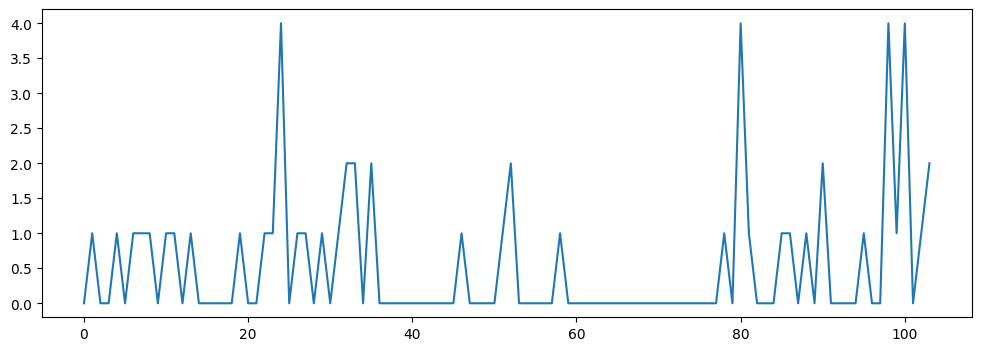

In [27]:
import matplotlib.pyplot as plt
result=[]
select_channel = 1
fs=256
duration = fs*30
eeg_data1 =np.array(eeg_data[select_channel])
split_data = [eeg_data1[i:i+duration] for i in range(0, len(eeg_data1), duration)]
for data in split_data:
    data = resample(data, 100*30)
    data = np.reshape(data,(1,1,-1))
    data = data.astype(np.float32)
    # print(data.shape)
    predict_data=torch.from_numpy(data)
    output = model(predict_data)
    pred = torch.argmax(output, dim=1)
    result.append(pred.item())
print(result)
# index_list = np.linspace(len(result))
# index_list = index_list / 2
plt.figure(figsize=(12,4))
plt.plot( result)           
plt.show()

[0, 0, 0, 1, 4, 0, 4, 0, 1, 0, 4, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2]


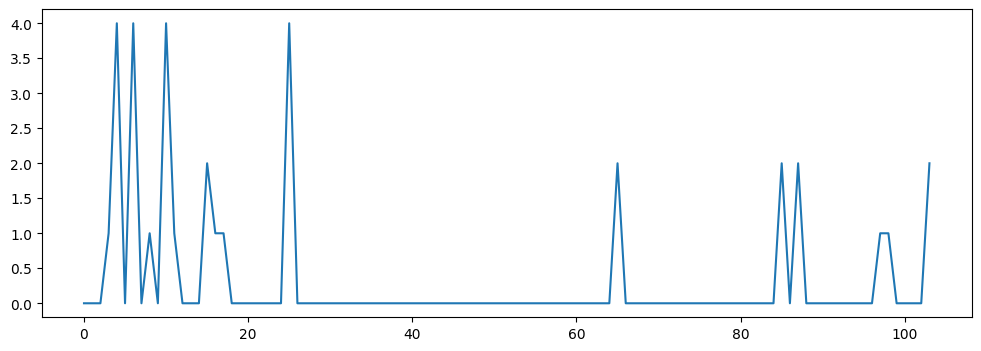

In [28]:
import matplotlib.pyplot as plt
result=[]
select_channel = 2
fs=256
duration = fs*30
eeg_data2 =np.array(eeg_data[select_channel])
split_data = [eeg_data2[i:i+duration] for i in range(0, len(eeg_data2), duration)]
for data in split_data:
    data = resample(data, 100*30)
    data = np.reshape(data,(1,1,-1))
    data = data.astype(np.float32)
    # print(data.shape)
    predict_data=torch.from_numpy(data)
    output = model(predict_data)
    pred = torch.argmax(output, dim=1)
    result.append(pred.item())
print(result)
# index_list = np.linspace(len(result))
# index_list = index_list / 2
plt.figure(figsize=(12,4))
plt.plot( result)           
plt.show()

[0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


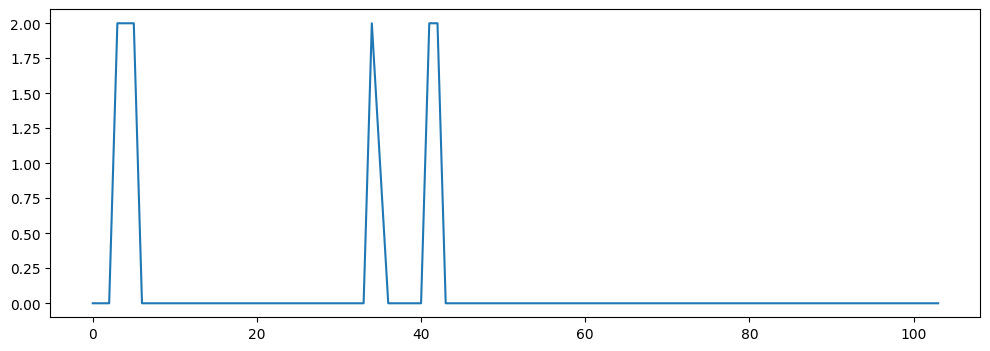

In [29]:
result=[]
select_channel = 3
fs=256
duration = fs*30
eeg_data3 =np.array(eeg_data[select_channel])
split_data = [eeg_data3[i:i+duration] for i in range(0, len(eeg_data3), duration)]
for data in split_data:
    data = resample(data, 100*30)
    data = np.reshape(data,(1,1,-1))
    data = data.astype(np.float32)
    # print(data.shape)
    predict_data=torch.from_numpy(data)
    output = model(predict_data)
    pred = torch.argmax(output, dim=1)
    result.append(pred.item())
print(result)
# index_list = np.linspace(len(result))
# index_list = index_list / 2
plt.figure(figsize=(12,4))
plt.plot( result)           
plt.show()